##### Here we load in the data and then we do bunch of analysis on it

In [1]:
##imports
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cluster = False
if cluster:
    path = '/home/sheczko/ptmp/data/' #Cluster
else:
    path = 'data/' ##local



In [41]:
tangent_paths_resutls_ridge

['data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Yeo-17.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Destrieux.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-AAL.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Desikan.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DesikanKlein.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-HarvardOxfordcort-maxprob-thr25.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-JHU.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Juelich.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DS00350.csv',
 'data/results/ridge_re

In [21]:
## load the data paths
tangent_paths_resutls_ridge = glob.glob(path + 'results/ridge_regression/tangent/*results*newalpha*') ##get the ridge tanget prediction accuracies
prec_paths_results_ridge = glob.glob(path + 'results/ridge_regression/precison/*results*newalpha*') ## percisn matrix as features
pearson_paths_resutls_ridge = glob.glob(path + 'results/ridge_regression/pearson/*results*') #person correlation matrix, flattened
partial_paths_results_ridge = glob.glob(path + 'results/ridge_regression/partial/*results*') #partial correlation matrix flattened

tangent_paths_resutls_SVR = glob.glob(path + 'results/SV_regression/tangent2/SVM_results*') ##SVR resutls - only tangetn correlation done
tangent_paths_resutls_PLS = glob.glob(path + 'results/PLS/tangent/PLS_results*') ##PLS results - only tangent exists


##use the paths to concentarte the target variables into dataframes+

tang_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_ridge),axis = 1, ignore_index=True) #get the df with all prediction vs real explained variance, tangent correlation with ridge regression 
tang_df_svm = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_SVR),axis = 1, ignore_index=True) #get the df with all prediction vs real explained variance, tangent correlation with SMR regression 
tang_df_pls = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_PLS),axis = 1, ignore_index=True) #tangent PLS dataframe


pear_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in pearson_paths_resutls_ridge),axis = 1, ignore_index=True) #Person ridge 
prc_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results_ridge),axis = 1, ignore_index=True) #Precision ridge
prt_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in partial_paths_results_ridge),axis = 1, ignore_index=True) #Partial ridge





In [107]:
tang_df_alphas = pd.concat((pd.read_csv(f)['GCA_opt_alphas'] for f in tangent_paths_resutls),axis = 1, ignore_index=True) ##get the alphas
pear_df_alphas = pd.concat((pd.read_csv(f)['GCA_opt_alphas'] for f in pearson_paths_resutls),axis = 1, ignore_index=True) ##get the pear alphas (debuggin to find the they were correclty optimised)

print(tang_df_alphas.head())
print(pear_df_alphas.head())
print([s.split('-')[-1].split('.')[0] for s in tangent_paths_resutls])

           0           1           2           3           4           5    
0  110.018194  112.183779  115.781194  111.490880  124.340110  119.995660  \
1  112.343391  118.240392  110.061699  104.121803  111.220297  105.879666   
2  110.218579  128.057216  121.152762  126.981264  118.641734  114.733887   
3  108.375033  117.082850  115.097526  111.506614  107.576359  123.244023   
4  101.638581  122.410265  110.383805  120.834355  119.779301  112.188333   

           6           7           8           9           10          11  
0  105.296965  115.820288  156.265340  110.944081  139.237265  116.691157  
1  114.691202  113.210948  113.511139  119.367877  111.400467  114.112651  
2  105.175100  108.241209  113.180434  114.420502  114.957234  142.580249  
3  120.494939  111.473886  143.280679  118.191092  123.895018  108.742536  
4  116.199461  107.313120  116.929287  115.645849  114.798299  118.252039  
           0            1           2            3           4            5    
0

In [23]:
##get the column names (atlses) for the dataframes

tangent_atlas_names_ridge = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_ridge]
tangent_atlas_names_ridge_2 = []
for list in tangent_atlas_names_ridge:
    tangent_atlas_names_ridge_2.append('_'.join(list))
tang_df_ridge.columns = tangent_atlas_names_ridge_2



tangent_atlas_names_SVR = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_SVR]
tangent_atlas_names_SVR_2 = []
for list in tangent_atlas_names_SVR:
    tangent_atlas_names_SVR_2.append('_'.join(list))
tang_df_svm.columns = tangent_atlas_names_SVR_2



tangent_atlas_names_PLS = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_PLS]
tangent_atlas_names_PLS_2 = []
for list in tangent_atlas_names_PLS:
    tangent_atlas_names_PLS_2.append('_'.join(list))
tang_df_pls.columns = tangent_atlas_names_PLS_2



<bound method NDFrame._add_numeric_operations.<locals>.max of CPAC200            0.142671
canICA200          0.138208
DS00350            0.149972
Schaefer200        0.136544
DictLearn400       0.126046
canICA100          0.116671
AICHAJoliot2015    0.144267
300ROis            0.126043
AAL                0.075674
Glasser            0.119743
DictLearn200       0.124850
Schaefer400        0.135167
dtype: float64>

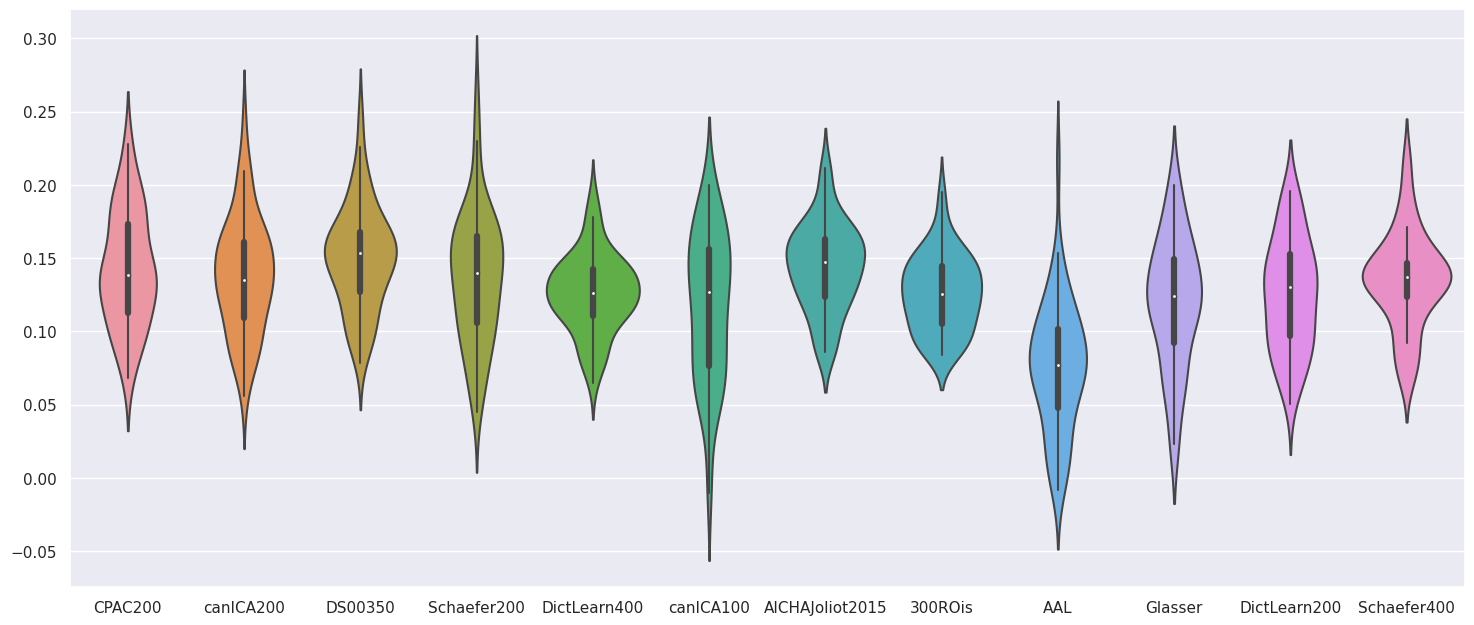

In [35]:
sns.set(rc = {'figure.figsize':(18,7.5)})



sns.violinplot(tang_df_pls)

tang_df_pls.mean().max

In [314]:
df_results_alph = df_results.sort_values('Atlas name').reset_index(drop = True)

In [326]:
n_areas = np.array([300,116,384,40,333,200,84,350,70,97,75,100,200,400,360,83,48,48,103,136,200,400,907,17,17,100,200])

#df_results_alph.to_csv(path + 'results/result_accuracies/tangent_all_atlases.csv')
print(df_results_alph.to_latex(index = False))

\begin{tabular}{lrrr}
\toprule
Atlas name & Mean expalinde variance & Standard deviation across 50 folds & number of parcels \\
\midrule
300ROis & 0.133008 & 0.027744 & 300 \\
AAL & 0.120897 & 0.029219 & 116 \\
AICHAJoliot2015 & 0.147621 & 0.031160 & 384 \\
Brodmann & 0.086448 & 0.033803 & 40 \\
CAPRSC & 0.131609 & 0.032345 & 333 \\
CPAC200 & 0.150040 & 0.034615 & 200 \\
DKT & 0.111722 & 0.037954 & 84 \\
DS00350 & 0.145230 & 0.033284 & 350 \\
Desikan & 0.096167 & 0.038799 & 70 \\
DesikanKlein & 0.103243 & 0.035522 & 97 \\
Destrieux & 0.130806 & 0.029424 & 75 \\
DictLearn100 & 0.169408 & 0.039529 & 100 \\
DictLearn200 & 0.130908 & 0.036231 & 200 \\
DictLearn400 & 0.130910 & 0.030439 & 400 \\
Glasser & 0.130694 & 0.035655 & 360 \\
Hammersmith & 0.094349 & 0.030119 & 83 \\
HarvardOxfordcort_maxprob_thr25 & 0.088358 & 0.035875 & 48 \\
JHU & 0.026128 & 0.016225 & 48 \\
Juelich & 0.094291 & 0.032409 & 103 \\
MICCAI & 0.130256 & 0.036947 & 136 \\
Schaefer200 & 0.144690 & 0.038415 & 200 \\
Sch

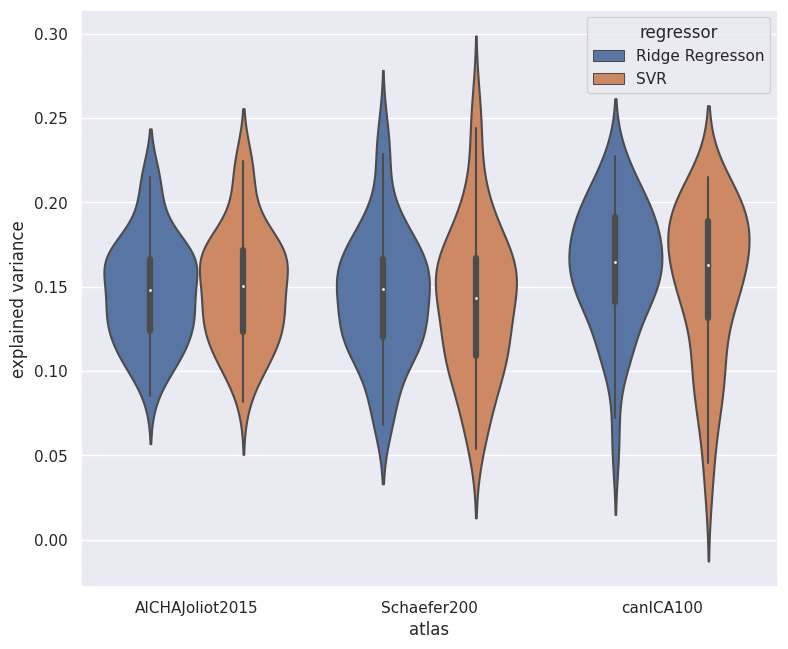

In [234]:

sns.set(rc = {'figure.figsize':(9,7.5)})

plot = sns.violinplot(data = new_try,x = 'atlas',y = 'explained variance',hue = 'regressor',alpha = 1)
fig = plot.get_figure()
fig.savefig(path + 'results/plots/SVRvsRR.pdf')

In [272]:
tang_df_ridge.T.iloc[0,0] = 'atlas

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Yeo_17,0.112713,0.045483,0.117639,0.070901,0.065181,0.060506,0.121525,0.123749,0.093782,0.053272,...,0.068022,0.042402,0.104547,0.079421,0.04408,0.093663,0.111365,0.100425,0.127099,0.097982
DictLearn400,0.126057,0.064088,0.14606,0.101428,0.092138,0.137536,0.149753,0.169827,0.119132,0.080659,...,0.137163,0.078457,0.153179,0.084965,0.129286,0.114812,0.147701,0.143088,0.202574,0.083494
Destrieux,0.164756,0.109726,0.14498,0.100204,0.109365,0.111283,0.175798,0.116605,0.100824,0.092996,...,0.132995,0.12044,0.123717,0.164384,0.116812,0.078205,0.171227,0.137888,0.208654,0.098042
AAL,0.131239,0.089464,0.148759,0.07994,0.094351,0.118691,0.1457,0.111766,0.090177,0.09209,...,0.158553,0.098221,0.148703,0.111677,0.083695,0.057207,0.129311,0.147805,0.228583,0.109197
Desikan,0.065956,0.047661,0.13674,0.072558,0.060354,0.061899,0.136741,0.132193,0.042327,0.051367,...,0.077789,0.015936,0.133481,0.057932,0.030984,0.048004,0.119048,0.147441,0.17891,0.077565
DesikanKlein,0.116091,0.037242,0.151467,0.081073,0.096497,0.083331,0.153121,0.097234,0.031519,0.073739,...,0.121595,0.036406,0.13634,0.089852,0.065247,0.053713,0.14896,0.149524,0.180236,0.089468
HarvardOxfordcort_maxprob_thr25,0.136635,0.107944,0.099413,0.098797,0.088725,0.069319,0.137392,0.042761,0.027131,0.052908,...,0.074149,0.03419,0.105109,0.036251,0.036251,0.057978,0.099226,0.123153,0.173829,0.106914
JHU,0.038257,0.020662,0.02801,-0.020713,0.042036,0.020697,0.024497,0.012591,-0.013296,-0.011473,...,0.030543,0.017798,0.017432,0.02502,0.005241,0.015094,0.01337,0.031322,0.056363,0.026221
Juelich,0.111121,0.039117,0.115481,0.088938,0.049258,0.100499,0.157577,0.121954,0.076095,0.062468,...,0.103998,0.114554,0.040174,0.091989,0.097862,0.044022,0.053272,0.095832,0.14816,0.086807
DS00350,0.141552,0.08689,0.156892,0.100584,0.099115,0.150871,0.173696,0.161428,0.09752,0.100899,...,0.133256,0.139684,0.145165,0.11887,0.142726,0.10271,0.161553,0.197175,0.223796,0.165601


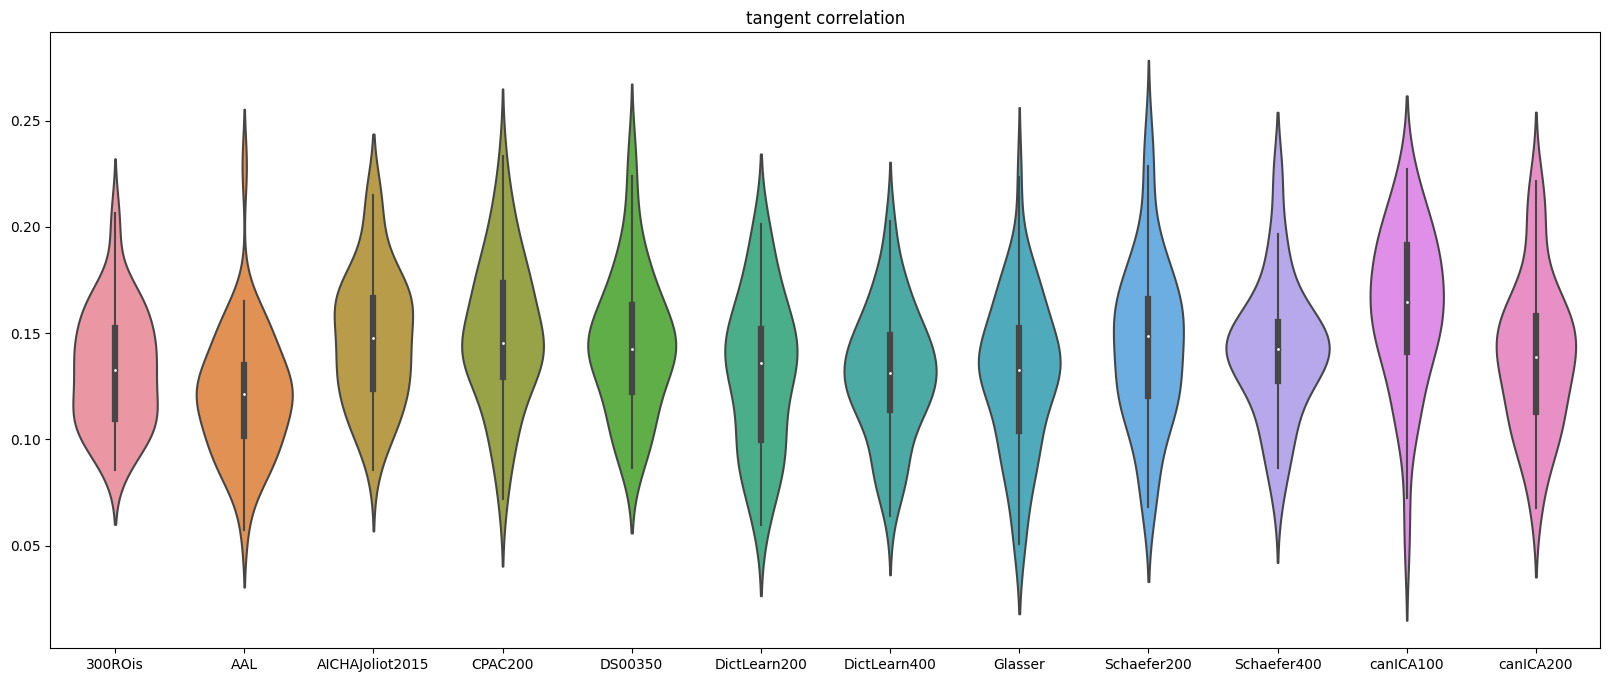

In [120]:
tangent_atlas_names_ [s.split('-')[-1].split('.')[0] for s in tangent_paths_resutls]

tang_df_alphabetical = tang_df.reindex(sorted(tang_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = tang_df_alphabetical)
plt.title('tangent correlation')

#plt.savefig(path + 'results/plots/tangent_corr_relevant_atlases.pdf')
#plt.show()



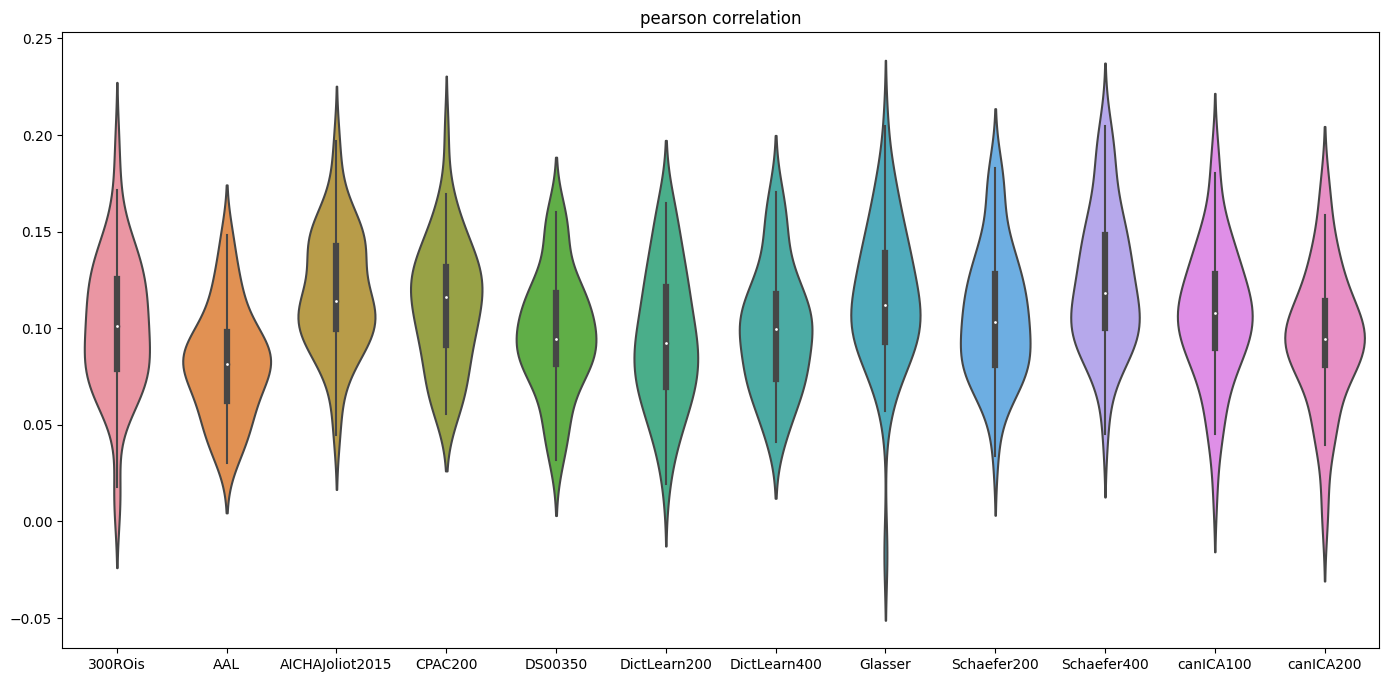

300ROis            0.100926
AAL                0.081438
AICHAJoliot2015    0.114194
CPAC200            0.116092
DS00350            0.094311
DictLearn200       0.092247
DictLearn400       0.099630
Glasser            0.111956
Schaefer200        0.103162
Schaefer400        0.118431
canICA100          0.107921
canICA200          0.094605
dtype: float64
300ROis            0.132485
AAL                0.121122
AICHAJoliot2015    0.147874
CPAC200            0.145250
DS00350            0.142675
DictLearn200       0.136063
DictLearn400       0.131229
Glasser            0.132734
Schaefer200        0.148422
Schaefer400        0.142678
canICA100          0.164812
canICA200          0.138861
dtype: float64


In [126]:
pear_df.columns = [s.split('-')[-1].split('.')[0] for s in pearson_paths_resutls]
pear_df_alphabetical = pear_df.reindex(sorted(pear_df.columns),axis = 1)

plt.figure(figsize=(17,8))
sns.violinplot(data = pear_df_alphabetical)

plt.title('pearson correlation')
#plt.savefig(path + 'results/plots/pearson_corr_relevant_atlases.pdf')
plt.show()
print(pear_df_alphabetical.median())
print(tang_df_alphabetical.median())

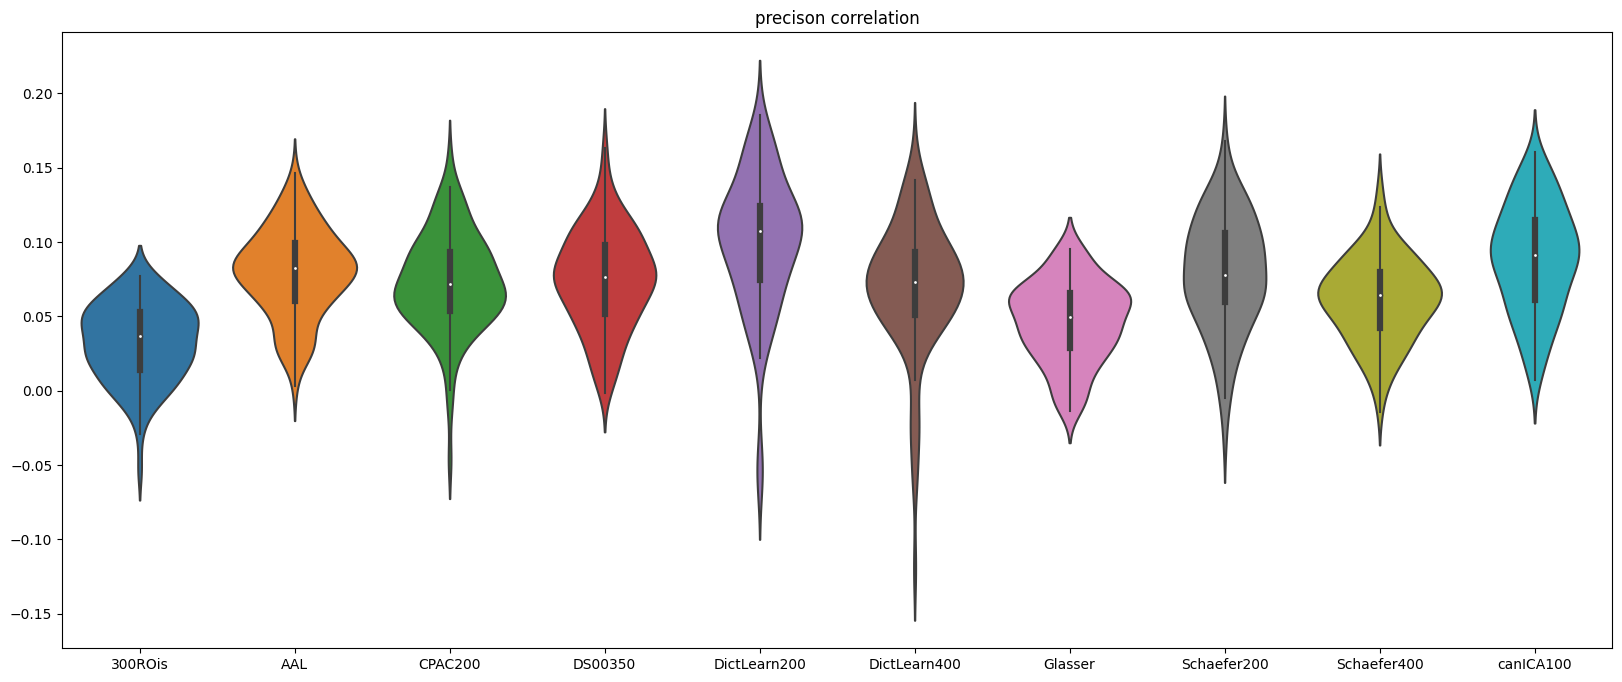

In [135]:


prc_df.columns = [s.split('-')[-1].split('.')[0] for s in prec_paths_results]
prc_df_a = prc_df.reindex(sorted(prc_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = prc_df_a)
plt.title('precison correlation')

plt.savefig(path + 'results/plots/precision_corr_relevant_atlases.pdf')
plt.show()
#

In [127]:
tangent_paths_resutls


['data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-AAL.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DS00350.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-CPAC200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA100.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Schaefer400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-300ROis.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Glasser.csv',
 'data/results/ridge_regression/tang

In [128]:
pearson_paths_resutls

['data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Glasser.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA100.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-AICHAJoliot2015.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DS00350.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-CPAC200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-300ROis.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn200.csv',
 'data/results/ridge_reg

In [137]:
tang_df_cor = pd.concat((pd.read_csv(f)['GCA_corr'] for f in tangent_paths_resutls),axis = 1, ignore_index=True)


In [177]:
pear_df.head()

,Glasser,Schaefer200,canICA100,AICHAJoliot2015,canICA200,DS00350,CPAC200,DictLearn400,Schaefer400,300ROis,DictLearn200,AAL
0,0.104533,0.110665,0.134887,0.113147,0.108509,0.089856,0.126180,0.090894,0.131423,0.077015,0.095859,0.089125
1,0.081416,0.095575,0.045404,0.100607,0.077757,0.082646,0.102038,0.070593,0.120410,0.106518,0.065514,0.066512
2,0.137870,0.124136,0.128137,0.112276,0.076173,0.084779,0.075797,0.076649,0.122899,0.124113,0.066322,0.080855
3,0.101744,0.066241,0.088149,0.103015,0.101716,0.050282,0.103375,0.072139,0.102928,0.067953,0.055277,0.040929
4,0.090923,0.064567,0.015888,0.057524,0.001215,0.031593,0.055715,0.072138,0.062593,0.067061,0.032638,0.051378


In [194]:
largest_tang = pd.DataFrame()
for k in range(tang_df.shape[1]):
    largest_tang[f'atlas{k}'] = tang_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_tang.shape
largest_pear = pd.DataFrame()
for k in range(pear_df.shape[1]):
    largest_pear[f'atlas{k}'] = pear_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_pear.shape

#prc_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results),axis = 1, ignore_index=True)
#prt_df 

largest_prc = pd.DataFrame()
for k in range(prc_df.shape[1]):
    largest_prc[f'atlas{k}'] = prc_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prc.shape
largest_prt = pd.DataFrame()
for k in range(prt_df.shape[1]):
    largest_prt[f'atlas{k}'] = prt_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prt.shape


(5, 12)

In [196]:
print(tang_df.shape,prt_df.shape)

(50, 12) (50, 12)


<Axes: >

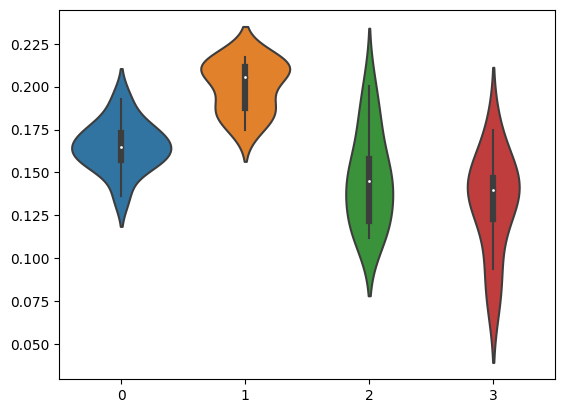

In [197]:
sns.violinplot(data = [largest_pear.mean(),largest_tang.mean(),largest_prt.mean(),largest_prc.mean()])

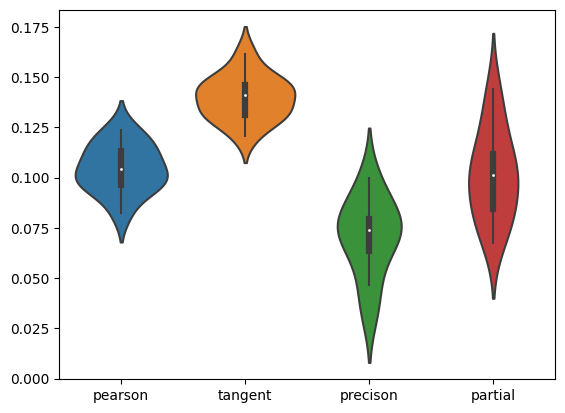

In [209]:
ax = sns.violinplot(data = [pear_df.mean(),tang_df.mean(),prc_df.mean(),prt_df.mean()])

ax.set_xticklabels(['pearson','tangent','precison','partial'])
ax.get_figure().savefig(path + 'results/plots/connectome_building_techiques.pdf')

False

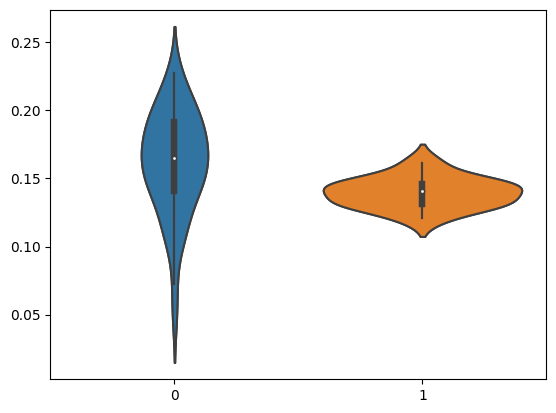

In [213]:
tang_df[tang_df.mean().idxmax()]

sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])

callable(sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])
)